In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_data_for_param(df):
    Kp = df['K'].unique()
    df_mse_K =  [df[df["K"] == param]["mse"].values for param in Kp]
    df_r2_K = [df[df["K"] == param]["r2"].values for param in Kp]
    df_er_K = [df[df["K"] == param]["error"].values for param in Kp]
    
    featp = df["n_features"].unique()
    df_mse_feat = [df[df["n_features"] == param]["mse"].values for param in featp]
    df_r2_feat = [df[df["n_features"] == param]["r2"].values for param in featp]
    df_er_feat = [df[df["n_features"] == param]["error"].values for param in featp]
    
    noisep = df["noise"].unique()
    df_mse_n = [df[df["noise"] == param]["mse"].values for param in noisep]
    df_r2_n = [df[df["noise"] == param]["r2"].values for param in noisep]
    df_er_n = [df[df["noise"] == param]["error"].values for param in noisep]
    
    samples = df['n_samples'].unique()
    df_mse_s = [df[df["n_samples"] == param]["mse"].values for param in samples]
    df_r2_s = [df[df["n_samples"] == param]["r2"].values for param in samples]
    df_er_s = [df[df["n_samples"] == param]["error"].values for param in samples]
    
    return [df_mse_K, df_r2_K, df_er_K], [df_mse_feat, df_r2_feat, df_er_feat], [df_mse_n, df_r2_n, df_er_n], [df_mse_s, df_r2_s, df_er_s] 

In [4]:
def create_boxplot_mse(df):
    
    title = input("Define the title for this plot:")
    
    Kp = df['K']
    fp = df['n_features']
    np = df['noise']
    sp = df['n_samples']
    
    fig, ax = plt.subplots(2,2, figsize = (12,11))
    sns.set_theme(style="darkgrid")

    sns.boxplot(x=Kp, y=df['mse'], ax=ax[0,0], width = 0.25 )

    # Labels and title
    ax[0,0].set_xlabel("K Setting")
    ax[0,0].set_ylabel("MSE")
    ax[0,0].set_title("MSE vs K")

    sns.boxplot(x=fp, y=df['mse'], ax=ax[0,1], width = 0.25)
    ax[0,1].set_xlabel("Number of Features Setting")
    ax[0,1].set_ylabel('MSE')
    ax[0,1].set_title(r"MSE vs Number of Features")

    sns.boxplot(x=np, y=df['mse'], ax=ax[1,0], width = 0.25)
    ax[1,0].set_xlabel("Noise Setting")
    ax[1,0].set_ylabel("MSE")
    ax[1,0].set_title("MSE vs Noise")
    
    sns.boxplot(x=sp, y=df['mse'], ax=ax[1,1], width = 0.25)
    ax[1,1].set_xlabel("Number of Samples")
    ax[1,1].set_ylabel("MSE")
    ax[1,1].set_title("MSE vs Number of Samples")
    
    
    
    plt.suptitle(title, fontsize=14, fontweight="bold")
    plt.subplots_adjust(top=0.9) 
    
    plt.show()

In [13]:
def heat_map_two_param(df, param1, param2, value, ax=None):
    pivot_table = df.pivot_table(index=param1, columns=param2, values=value, aggfunc="mean")  

    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))  # Create new figure if no axes are provided

    sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
    ax.set_xlabel(param2)
    ax.set_ylabel(param1)
    ax.set_title(f"Heatmap of {value} by {param1} and {param2}")

In [6]:
avg_exp_constant = 'Data/average_constant_e5.csv'
avg_exp_unif ='Data/average_uniform_e5.csv'
avg_exp_bin = 'Data/average_binary_e5.csv'
avg_exp_normal = 'Data/average_normal_e5.csv'
avg_exp_linspace = 'Data/average_linspace_e5.csv'

df_avg_constant = pd.read_csv(avg_exp_constant)
df_avg_bin = pd.read_csv(avg_exp_bin)
df_avg_unif = pd.read_csv(avg_exp_unif)
df_avg_normal = pd.read_csv(avg_exp_normal)
df_avg_linspace = pd.read_csv(avg_exp_linspace)

Parameters:
* K = 2,3,4
* d+1 = 2,3,4
* N = 50,200,1000
* $\epsilon$ = 0.0, 0.1, 1.0
* Number of Trials = 50
* w_range = Uniform(0,1)
* x_rang = Uniform(0,10) 
* y = $Xw$ + Normal(0,$\epsilon$)

### Precision Vector with Binary Values
P is choosen with the formula $2^{-k}, k = 0,...,K$

#### Effect of Parameters 

Boxplot of MSE for the different parameters used.

Define the title for this plot:Precision Vector with Binary Values


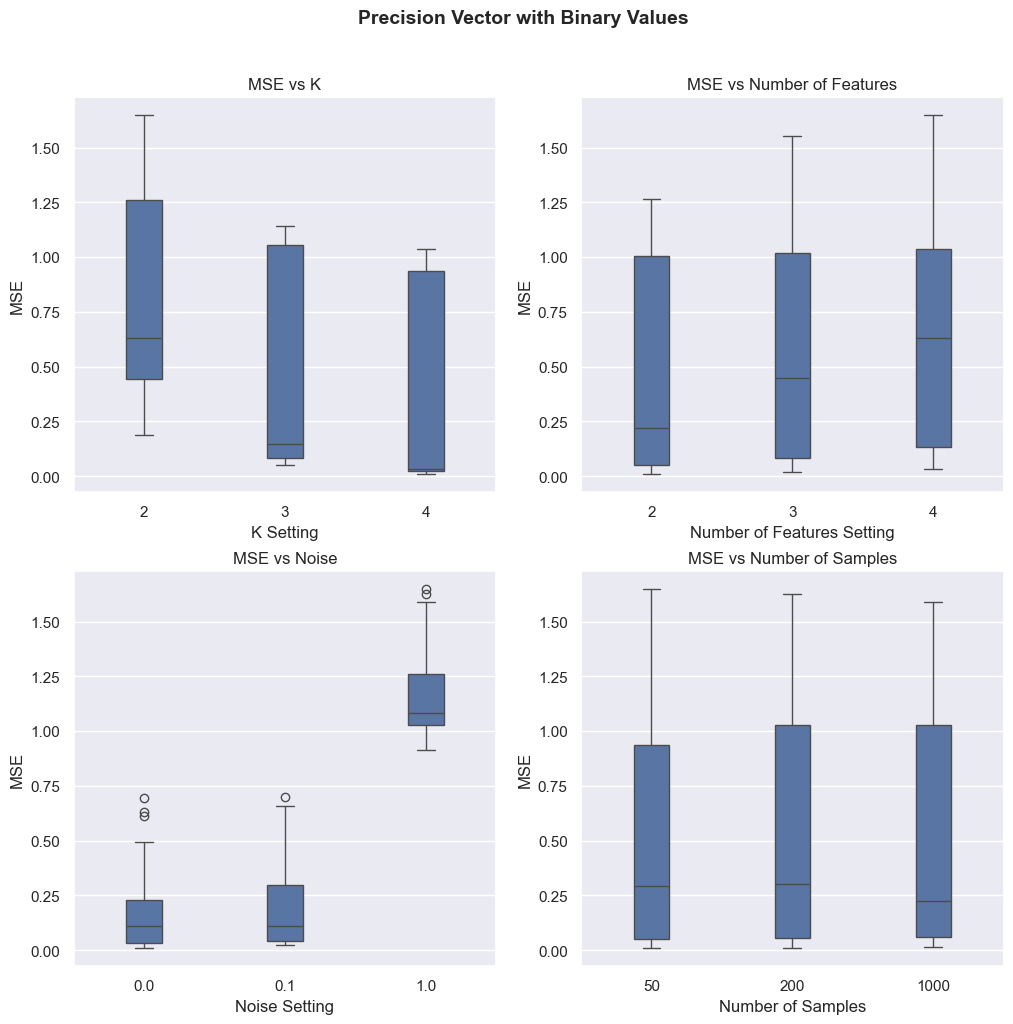

In [8]:
df_binary_error_K, df_binary_error_feat, df_binary_error_noise, df_binary_error_samples = get_data_for_param(df_avg_bin)
create_boxplot_mse(df_avg_bin)

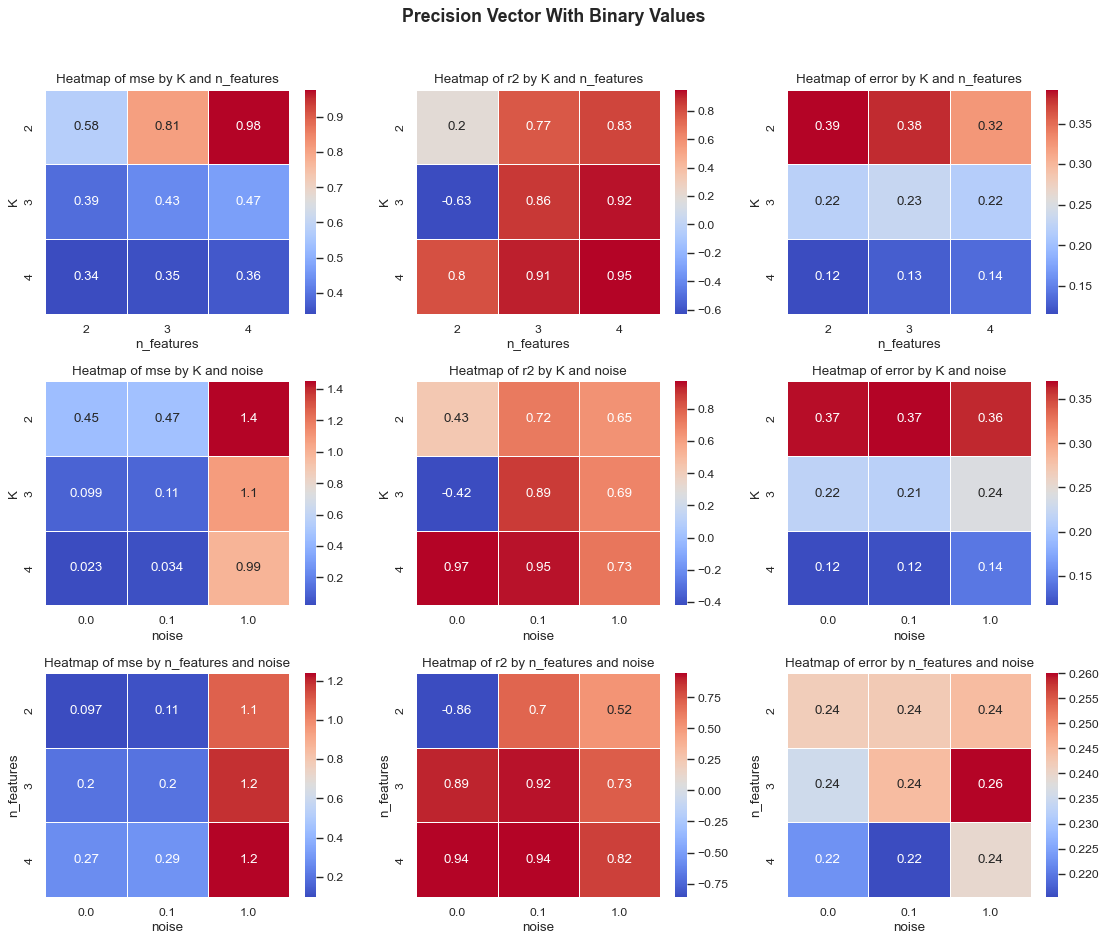

In [14]:
fig,ax = plt.subplots(3,3, figsize = (14,12),dpi=80)
plt.suptitle('Precision Vector with Binary Values', fontsize=16, fontweight="bold")

titles = ['Number of Features and K', 'Noise and K', 'Noise and Number of Features']


#ax[0, 1].set_title("K vs Features", fontsize=14, fontweight="bold", pad=20)
#ax[1, 1].set_title("K vs Noise", fontsize=14, fontweight="bold",pad=20)
#ax[2, 1].set_title("Features vs Noise", fontsize=14, fontweight="bold",pad=20)
    

heat_map_two_param(df_avg_bin, 'K','n_features','mse', ax = ax[0,0])
heat_map_two_param(df_avg_bin,'K','n_features','r2', ax = ax[0,1])
heat_map_two_param(df_avg_bin,'K','n_features','error', ax = ax[0,2])
heat_map_two_param(df_avg_bin,'K','noise','mse', ax = ax[1,0])
heat_map_two_param(df_avg_bin,'K','noise','r2', ax = ax[1,1])
heat_map_two_param(df_avg_bin,'K','noise','error', ax = ax[1,2])
heat_map_two_param(df_avg_bin,'n_features','noise','mse', ax = ax[2,0])
heat_map_two_param(df_avg_bin,'n_features','noise','r2', ax = ax[2,1])
heat_map_two_param(df_avg_bin,'n_features','noise','error', ax = ax[2,2])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Precision Vector With Linearly Separable Values
List with values from 0.1 to 1 separated by (1-0.1)/K
#### Effect of Parameters 

Boxplot of MSE for the different parameters used.

Define the title for this plot:Precision Vector With Linearly Separable Values


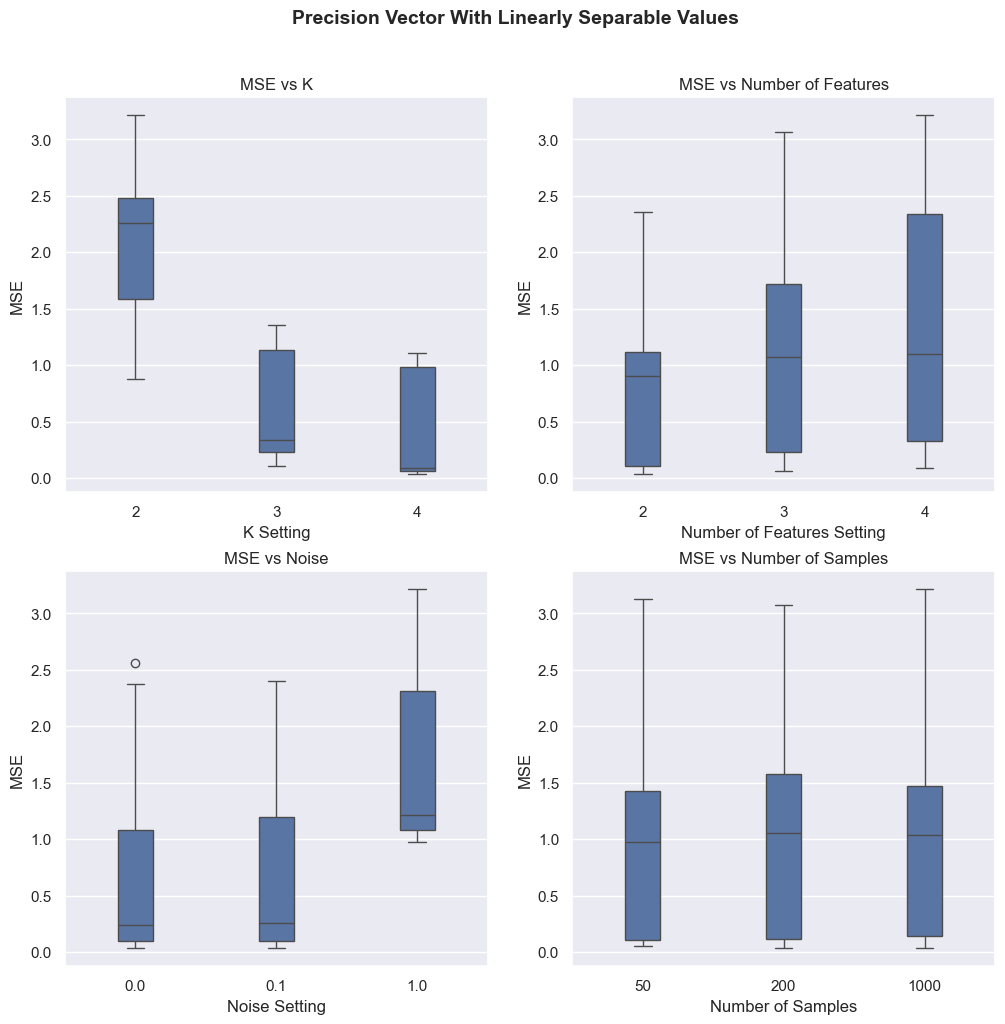

In [25]:
df_linspace_error_K, df_linspace_error_f,df_linspace_error_n, df_linspace_error_s = get_data_for_param(df_avg_linspace)
create_boxplot_mse(df_avg_linspace)

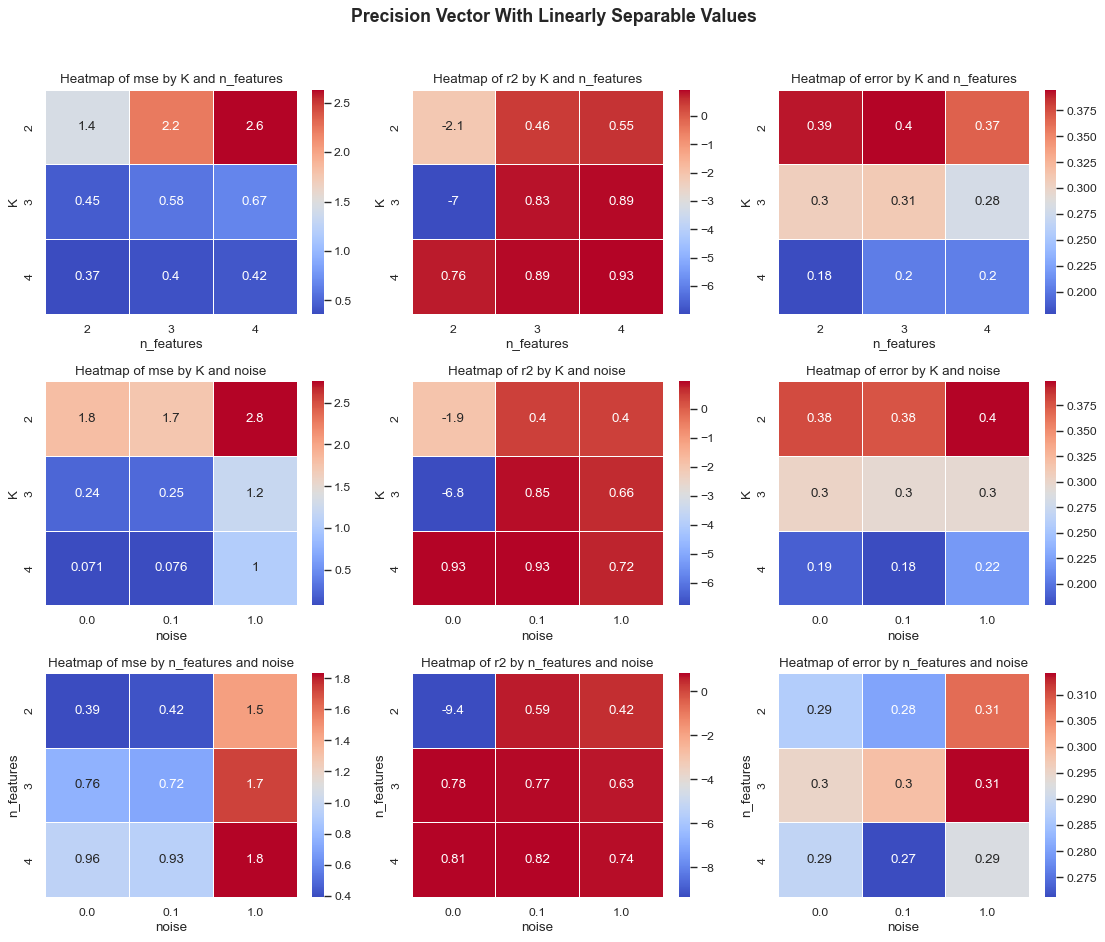

In [26]:
fig,ax = plt.subplots(3,3, figsize = (14,12),dpi=80)
plt.suptitle('Precision Vector With Linearly Separable Values', fontsize=16, fontweight="bold")

titles = ['Number of Features and K', 'Noise and K', 'Noise and Number of Features']


#ax[0, 1].set_title("K vs Features", fontsize=14, fontweight="bold", pad=20)
#ax[1, 1].set_title("K vs Noise", fontsize=14, fontweight="bold",pad=20)
#ax[2, 1].set_title("Features vs Noise", fontsize=14, fontweight="bold",pad=20)
    

heat_map_two_param(df_avg_linspace, 'K','n_features','mse', ax = ax[0,0])
heat_map_two_param(df_avg_linspace,'K','n_features','r2', ax = ax[0,1])
heat_map_two_param(df_avg_linspace,'K','n_features','error', ax = ax[0,2])
heat_map_two_param(df_avg_linspace,'K','noise','mse', ax = ax[1,0])
heat_map_two_param(df_avg_linspace,'K','noise','r2', ax = ax[1,1])
heat_map_two_param(df_avg_linspace,'K','noise','error', ax = ax[1,2])
heat_map_two_param(df_avg_linspace,'n_features','noise','mse', ax = ax[2,0])
heat_map_two_param(df_avg_linspace,'n_features','noise','r2', ax = ax[2,1])
heat_map_two_param(df_avg_linspace,'n_features','noise','error', ax = ax[2,2])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Precision Vector With Constant Values
List with values equal to $\frac{1}{K}$
#### Effect of Parameters 

Boxplot of MSE for the different parameters used.

Define the title for this plot:Precision Vector With Constant Values


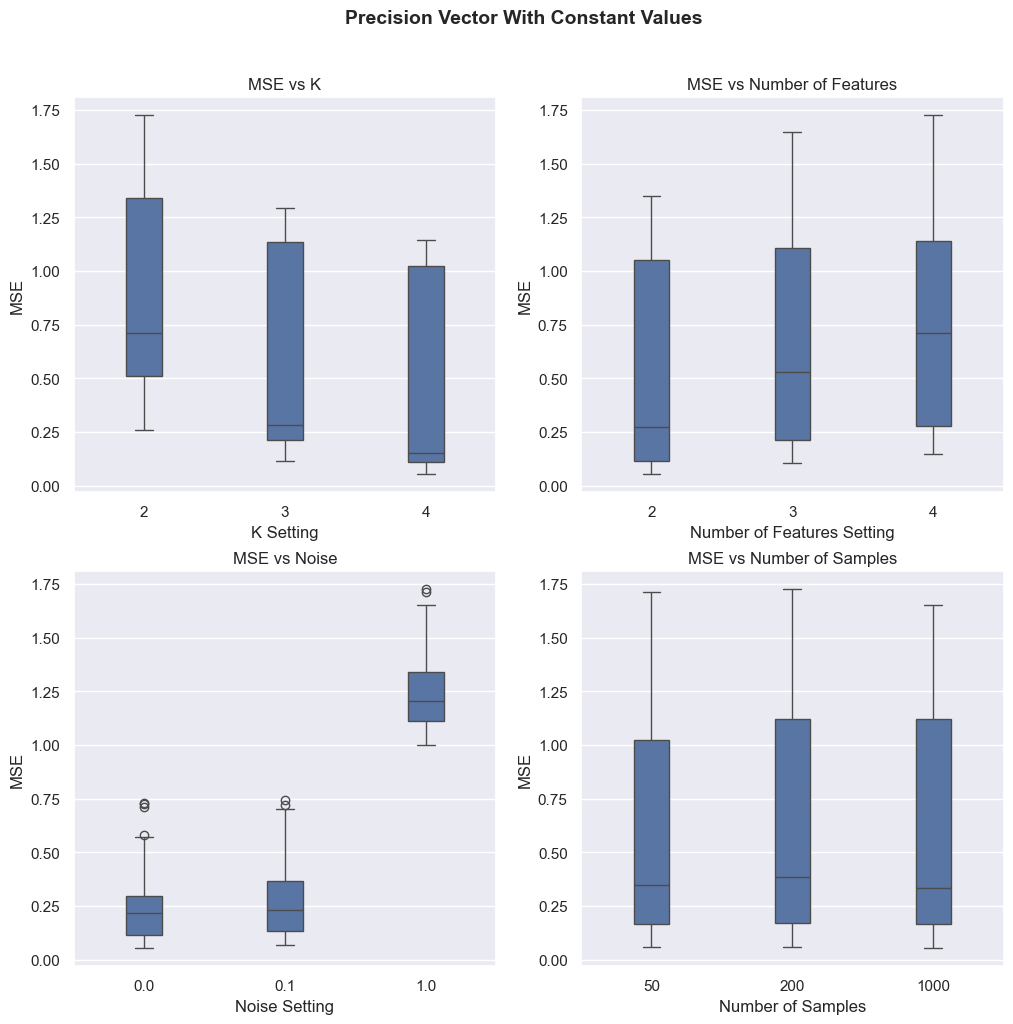

In [27]:
df_const_error_K, df_const_error_f,df_const_error_n, df_const_error_s = get_data_for_param(df_avg_constant) 
create_boxplot_mse(df_avg_constant)

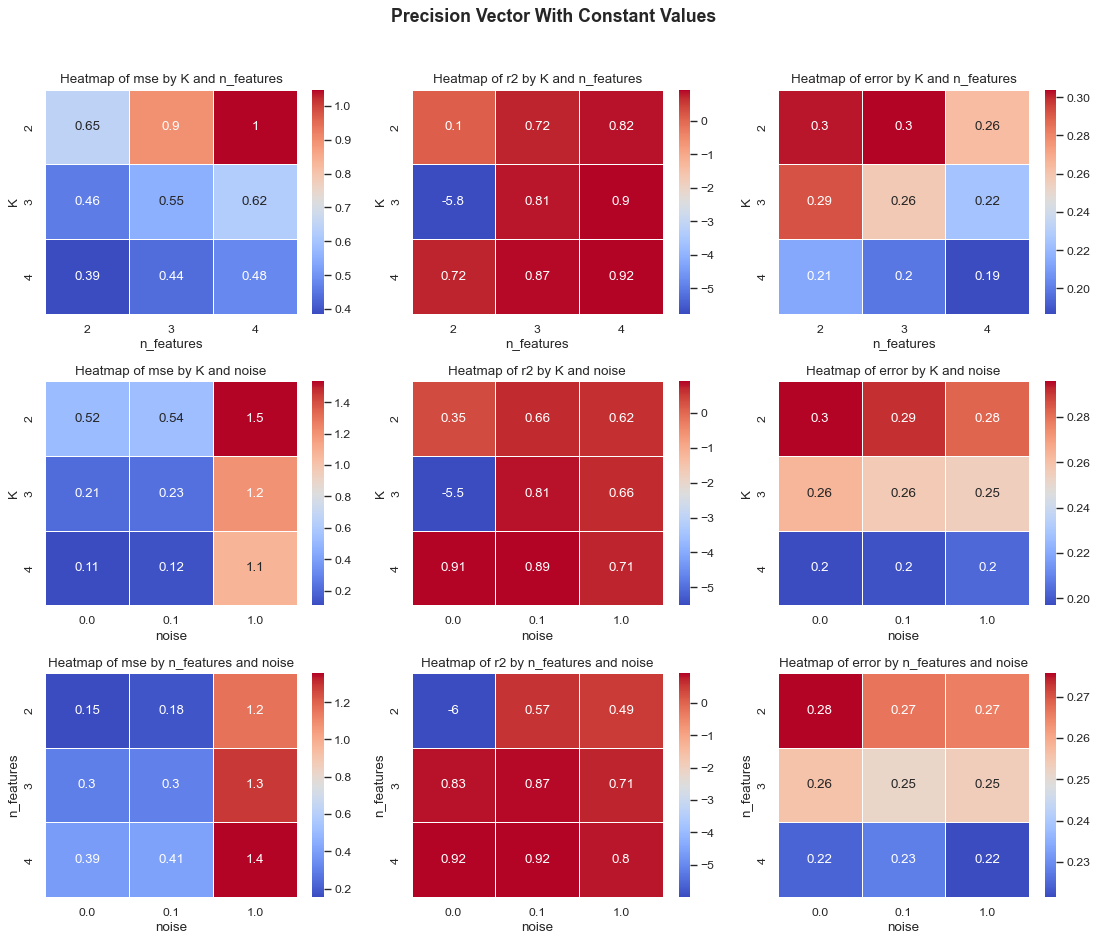

In [28]:
fig,ax = plt.subplots(3,3, figsize = (14,12),dpi=80)
plt.suptitle('Precision Vector With Constant Values', fontsize=16, fontweight="bold")

titles = ['Number of Features and K', 'Noise and K', 'Noise and Number of Features']


#ax[0, 1].set_title("K vs Features", fontsize=14, fontweight="bold", pad=20)
#ax[1, 1].set_title("K vs Noise", fontsize=14, fontweight="bold",pad=20)
#ax[2, 1].set_title("Features vs Noise", fontsize=14, fontweight="bold",pad=20)
    

heat_map_two_param(df_avg_constant, 'K','n_features','mse', ax = ax[0,0])
heat_map_two_param(df_avg_constant,'K','n_features','r2', ax = ax[0,1])
heat_map_two_param(df_avg_constant,'K','n_features','error', ax = ax[0,2])
heat_map_two_param(df_avg_constant,'K','noise','mse', ax = ax[1,0])
heat_map_two_param(df_avg_constant,'K','noise','r2', ax = ax[1,1])
heat_map_two_param(df_avg_constant,'K','noise','error', ax = ax[1,2])
heat_map_two_param(df_avg_constant,'n_features','noise','mse', ax = ax[2,0])
heat_map_two_param(df_avg_constant,'n_features','noise','r2', ax = ax[2,1])
heat_map_two_param(df_avg_constant,'n_features','noise','error', ax = ax[2,2])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Precision Vector With Uniform Values

P is choosen randomly from a uniform distribution between 0 and 1.
#### Effect of Parameters 

Boxplot of MSE for the different parameters used.

Heatmap shows the effect of the combination of two parameters with different types of error.

Define the title for this plot:Precision Vector With Uniform Values


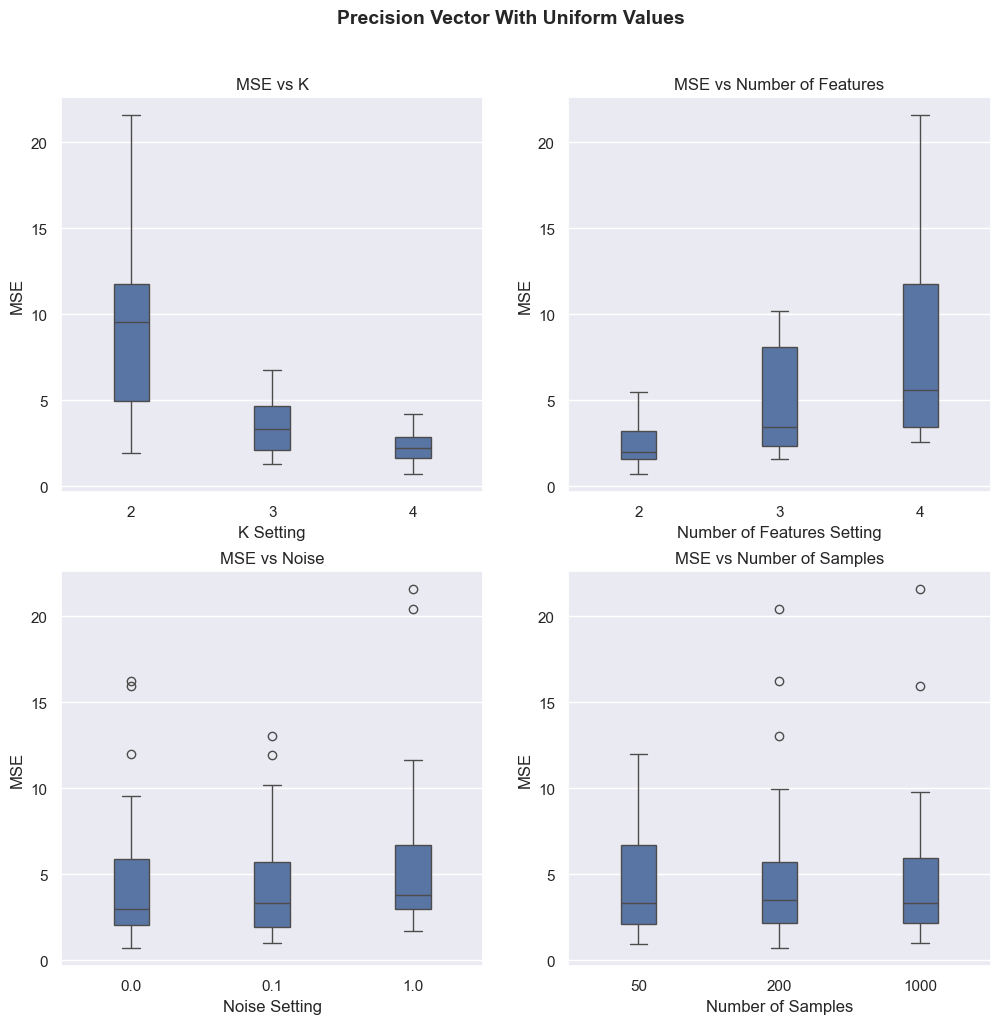

In [30]:
df_unif_error_K,df_unif_error_f,df_unif_error_n, df_unif_error_s = get_data_for_param(df_avg_unif) 
create_boxplot_mse(df_avg_unif)

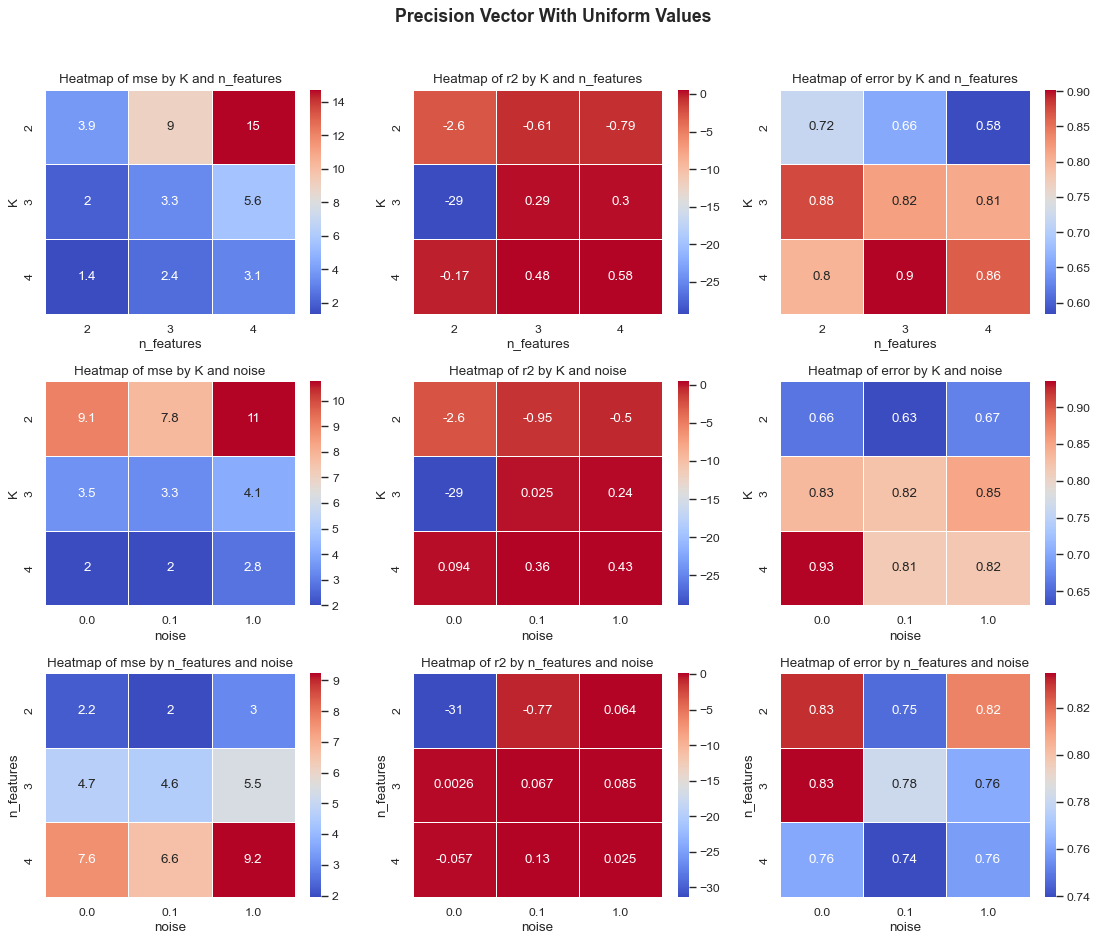

In [20]:
fig,ax = plt.subplots(3,3, figsize = (14,12),dpi=80)
plt.suptitle('Precision Vector With Uniform Values', fontsize=16, fontweight="bold")

titles = ['Number of Features and K', 'Noise and K', 'Noise and Number of Features']


#ax[0, 1].set_title("K vs Features", fontsize=14, fontweight="bold", pad=20)
#ax[1, 1].set_title("K vs Noise", fontsize=14, fontweight="bold",pad=20)
#ax[2, 1].set_title("Features vs Noise", fontsize=14, fontweight="bold",pad=20)
    

heat_map_two_param(df_avg_unif, 'K','n_features','mse', ax = ax[0,0])
heat_map_two_param(df_avg_unif,'K','n_features','r2', ax = ax[0,1])
heat_map_two_param(df_avg_unif,'K','n_features','error', ax = ax[0,2])
heat_map_two_param(df_avg_unif,'K','noise','mse', ax = ax[1,0])
heat_map_two_param(df_avg_unif,'K','noise','r2', ax = ax[1,1])
heat_map_two_param(df_avg_unif,'K','noise','error', ax = ax[1,2])
heat_map_two_param(df_avg_unif,'n_features','noise','mse', ax = ax[2,0])
heat_map_two_param(df_avg_unif,'n_features','noise','r2', ax = ax[2,1])
heat_map_two_param(df_avg_unif,'n_features','noise','error', ax = ax[2,2])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Precision Vector With Normal Values
P is choosen randomly from a normal distribution with mean 1 and sigma 0.
#### Effect of Parameters 

Boxplot of MSE for the different parameters used.

Define the title for this plot:Precision Vector With Normal Values


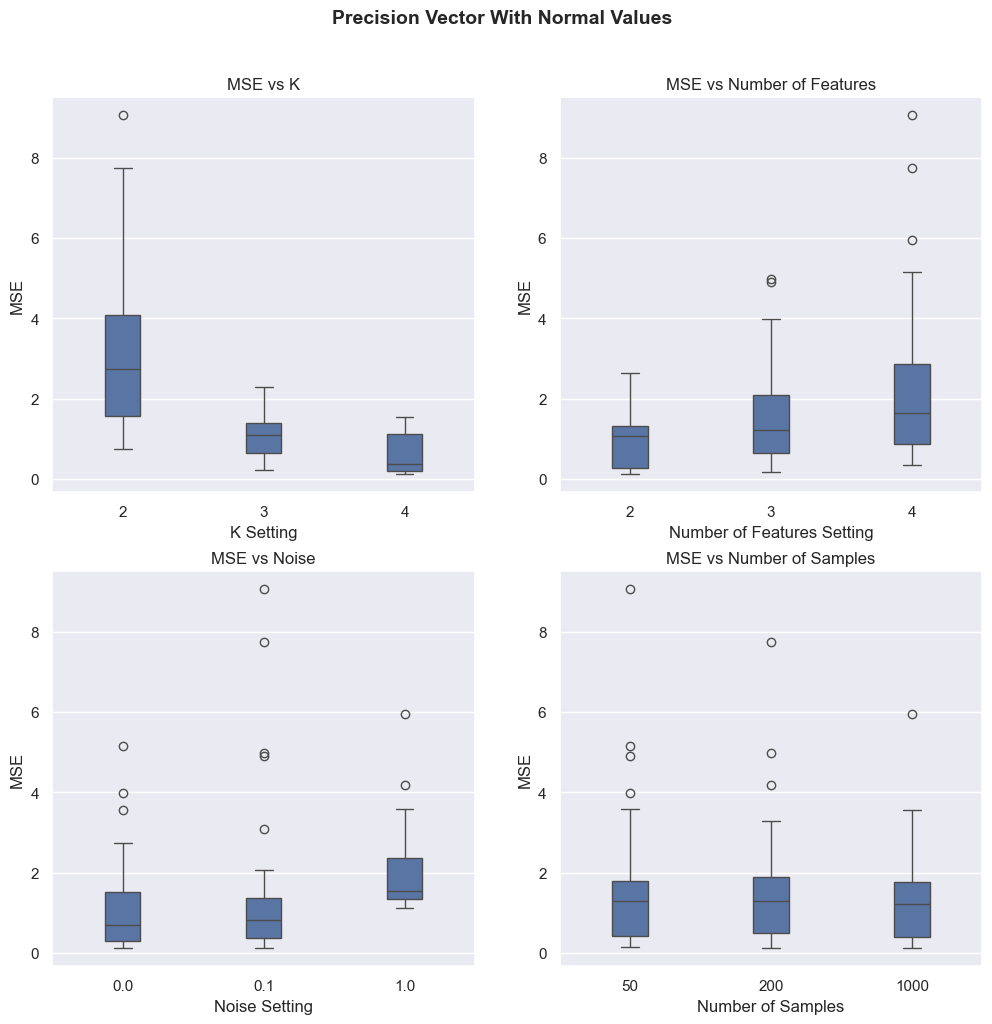

In [31]:
df_normal_errors_K, df_normal_errors_f,df_normal_errors_n, df_normal_errors_s= get_data_for_param(df_avg_normal)
create_boxplot_mse(df_avg_normal)

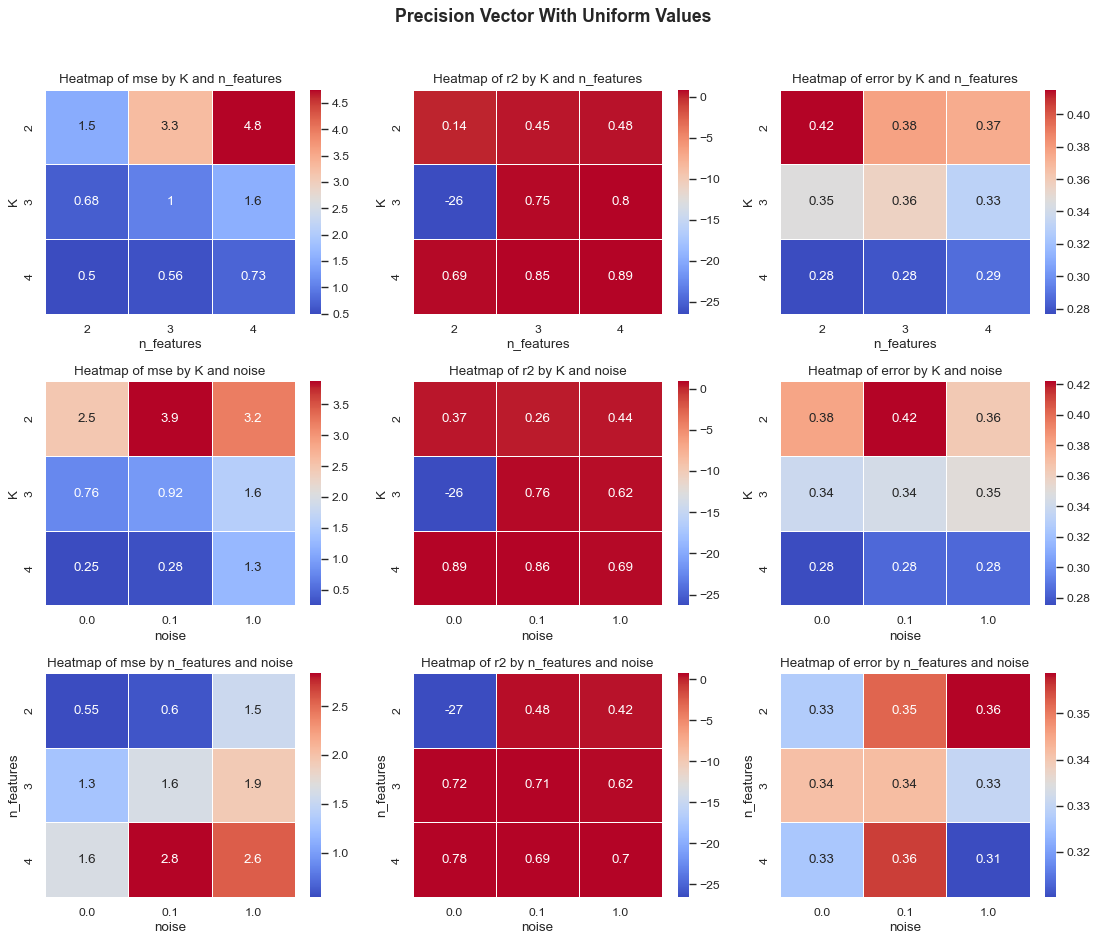

In [22]:
fig,ax = plt.subplots(3,3, figsize = (14,12),dpi=80)
plt.suptitle('Precision Vector With Normal Values', fontsize=16, fontweight="bold")

titles = ['Number of Features and K', 'Noise and K', 'Noise and Number of Features']


#ax[0, 1].set_title("K vs Features", fontsize=14, fontweight="bold", pad=20)
#ax[1, 1].set_title("K vs Noise", fontsize=14, fontweight="bold",pad=20)
#ax[2, 1].set_title("Features vs Noise", fontsize=14, fontweight="bold",pad=20)
    

heat_map_two_param(df_avg_normal, 'K','n_features','mse', ax = ax[0,0])
heat_map_two_param(df_avg_normal,'K','n_features','r2', ax = ax[0,1])
heat_map_two_param(df_avg_normal,'K','n_features','error', ax = ax[0,2])
heat_map_two_param(df_avg_normal,'K','noise','mse', ax = ax[1,0])
heat_map_two_param(df_avg_normal,'K','noise','r2', ax = ax[1,1])
heat_map_two_param(df_avg_normal,'K','noise','error', ax = ax[1,2])
heat_map_two_param(df_avg_normal,'n_features','noise','mse', ax = ax[2,0])
heat_map_two_param(df_avg_normal,'n_features','noise','r2', ax = ax[2,1])
heat_map_two_param(df_avg_normal,'n_features','noise','error', ax = ax[2,2])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()